In [36]:
library(ggplot2)
library(magrittr)
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:ggplot2’:

    vars


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [21]:
mpg2 <- subset(mpg, cyl != 5 & drv %in% c("4", "f") & class != "2seater")

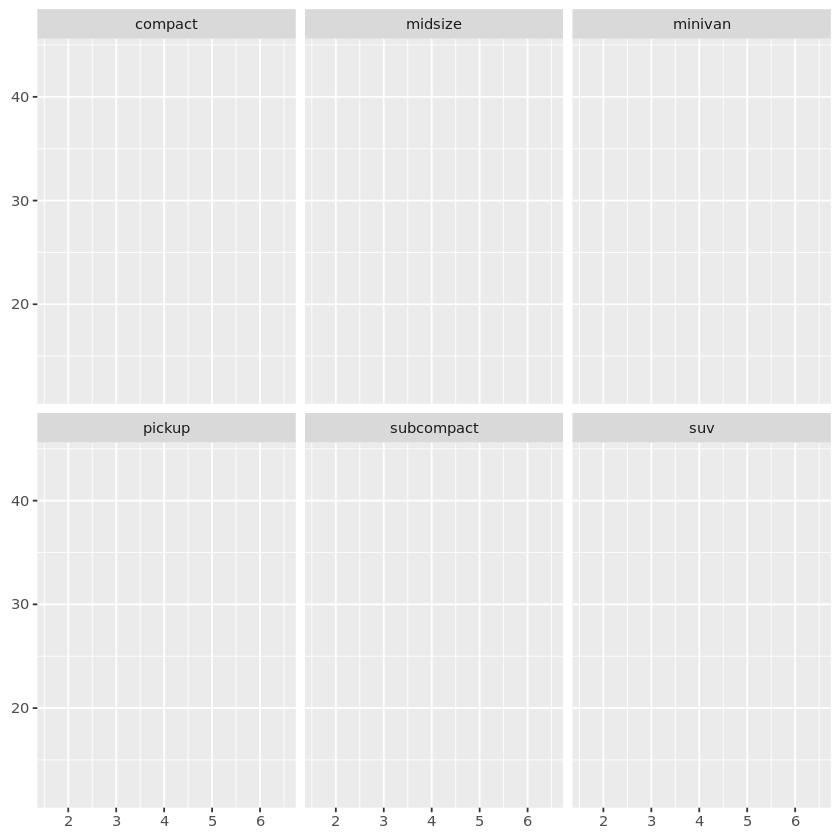

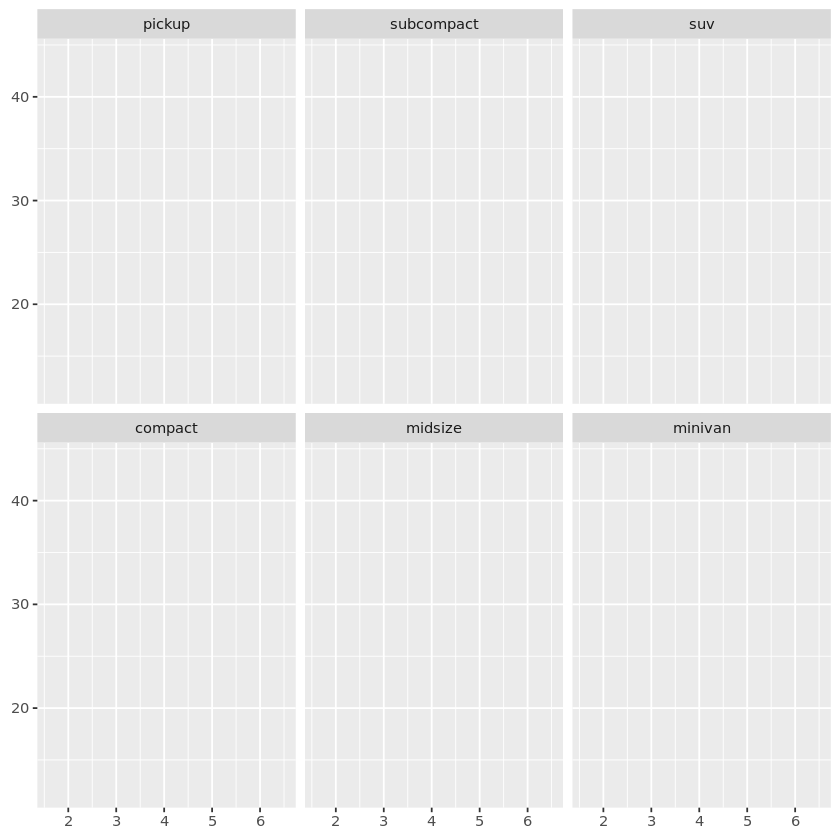

In [22]:
base <- ggplot(mpg2, aes(displ, hwy)) + 
  geom_blank() + 
  xlab(NULL) + 
  ylab(NULL)

base + facet_wrap(~class, ncol = 3)
base + facet_wrap(~class, ncol = 3, as.table = FALSE)

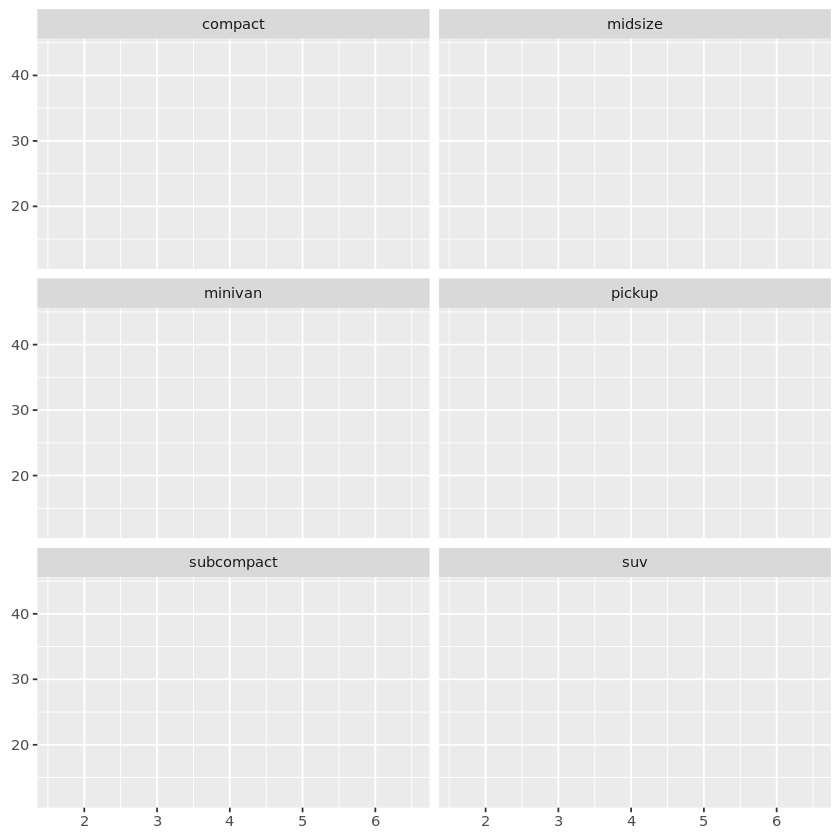

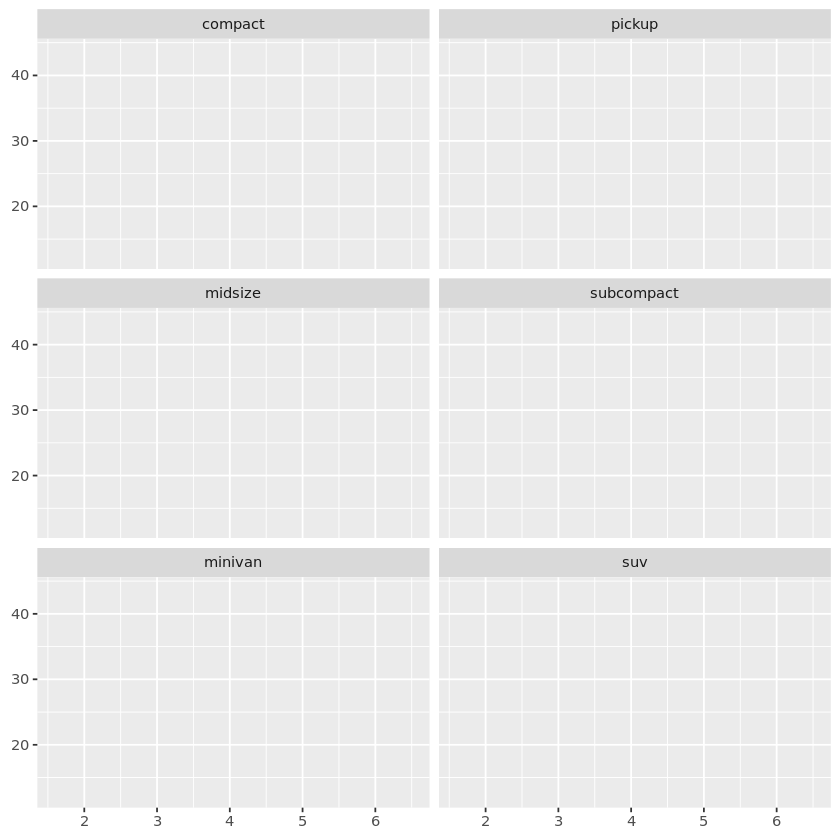

In [23]:
base + facet_wrap(~class, nrow = 3)
base + facet_wrap(~class, nrow = 3, dir = "v")

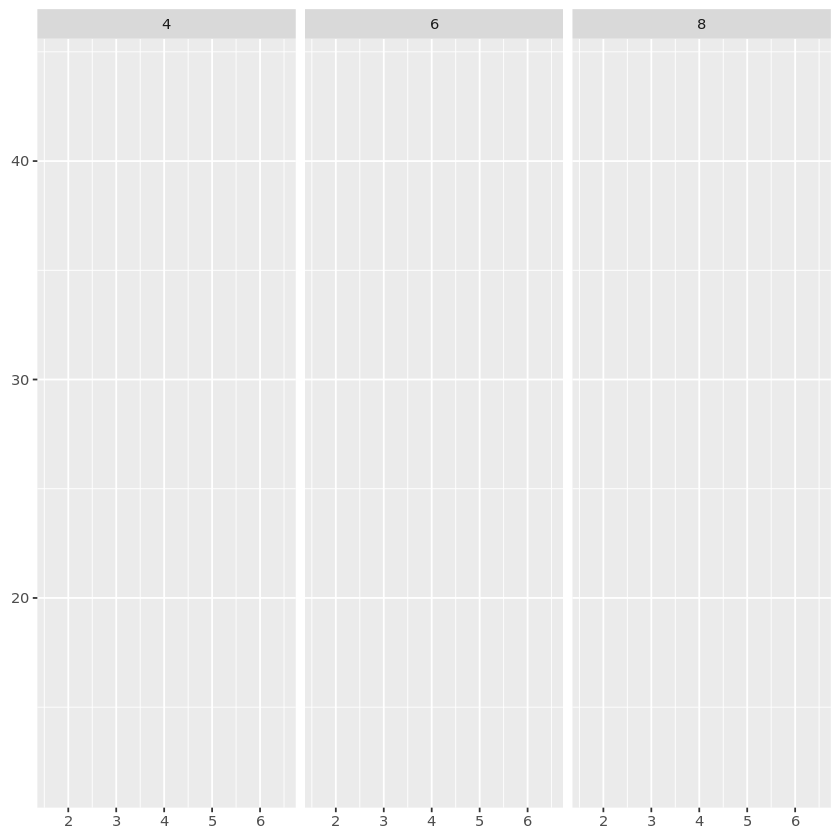

In [24]:
base + facet_grid(. ~ cyl)

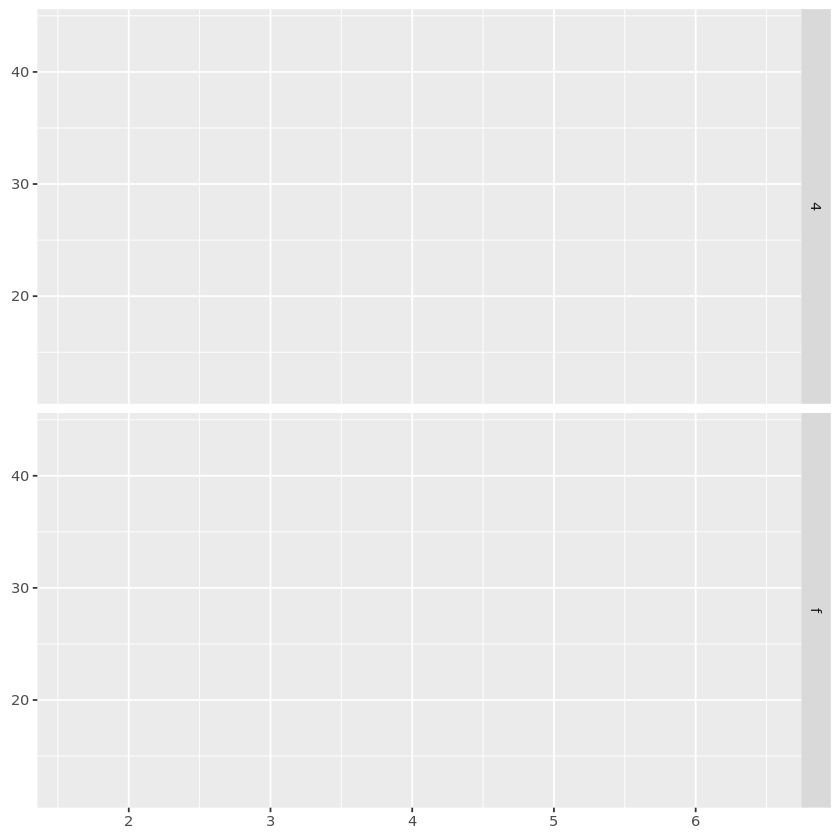

In [25]:
base + facet_grid(drv ~ .)

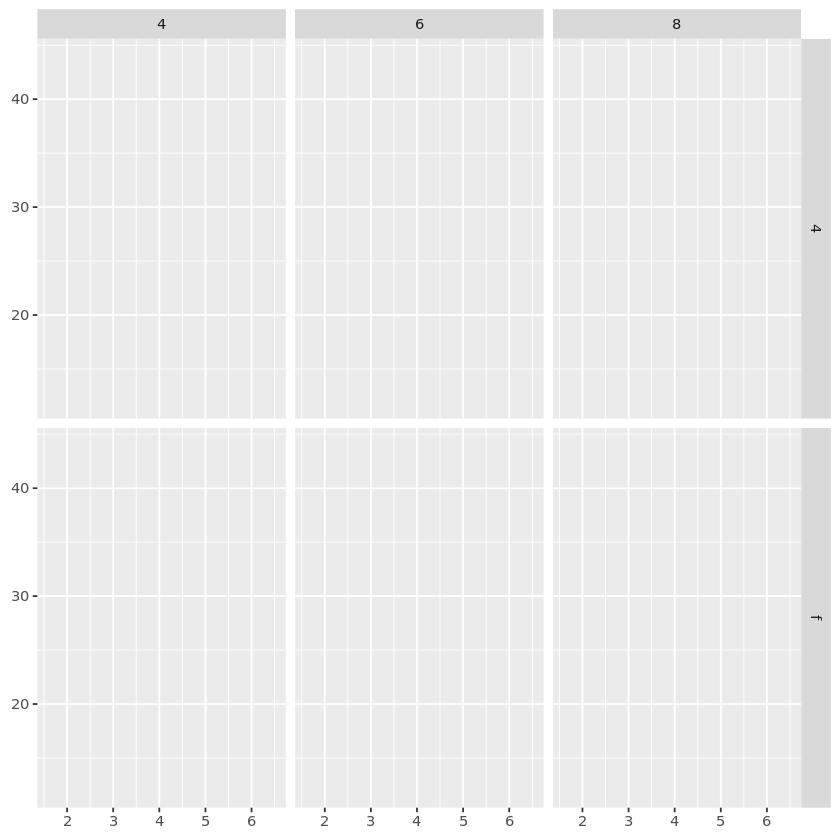

In [26]:
base + facet_grid(drv ~ cyl)

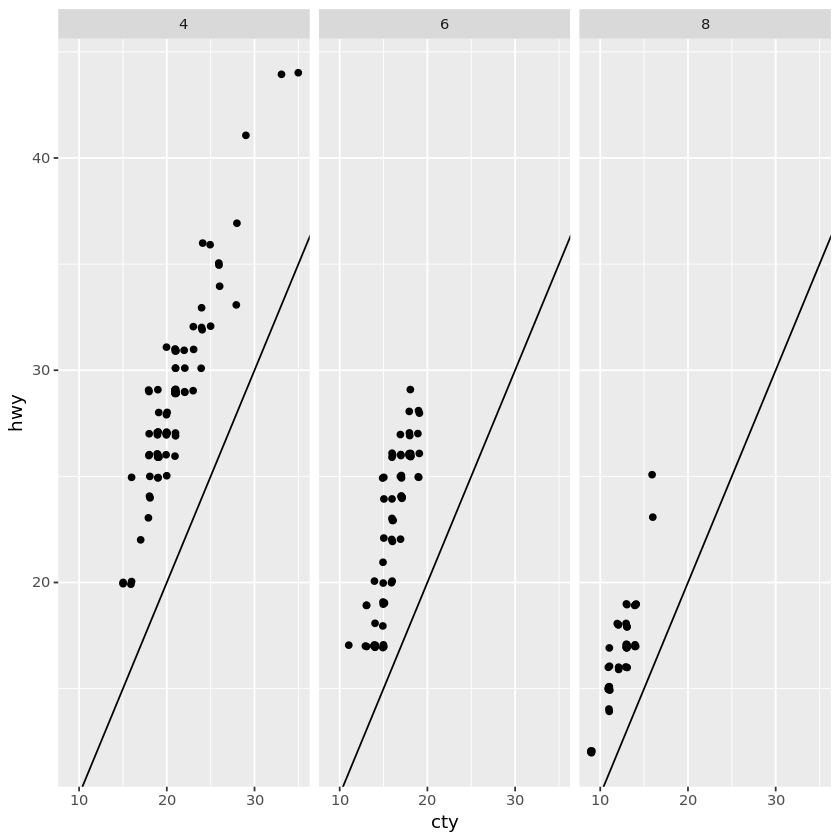

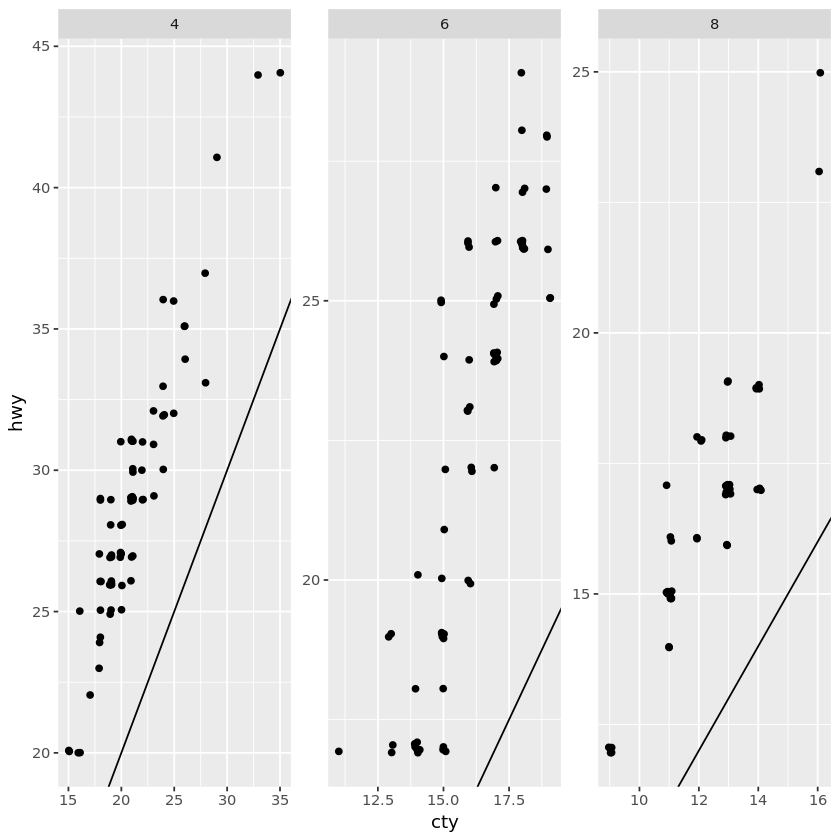

In [27]:
p <- ggplot(mpg2, aes(cty, hwy)) + 
  geom_abline() +
  geom_jitter(width = 0.1, height = 0.1)

p + facet_wrap(~cyl)
p + facet_wrap(~cyl, scales = "free")

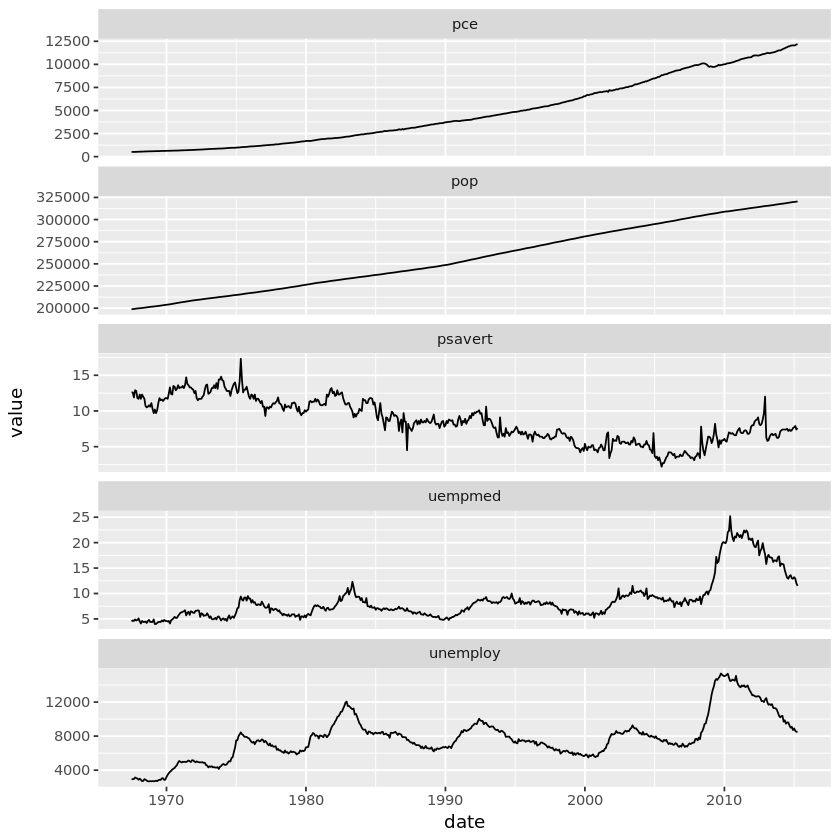

In [28]:
ggplot(economics_long, aes(date, value)) + 
  geom_line() + 
  facet_wrap(~variable, scales = "free_y", ncol = 1)

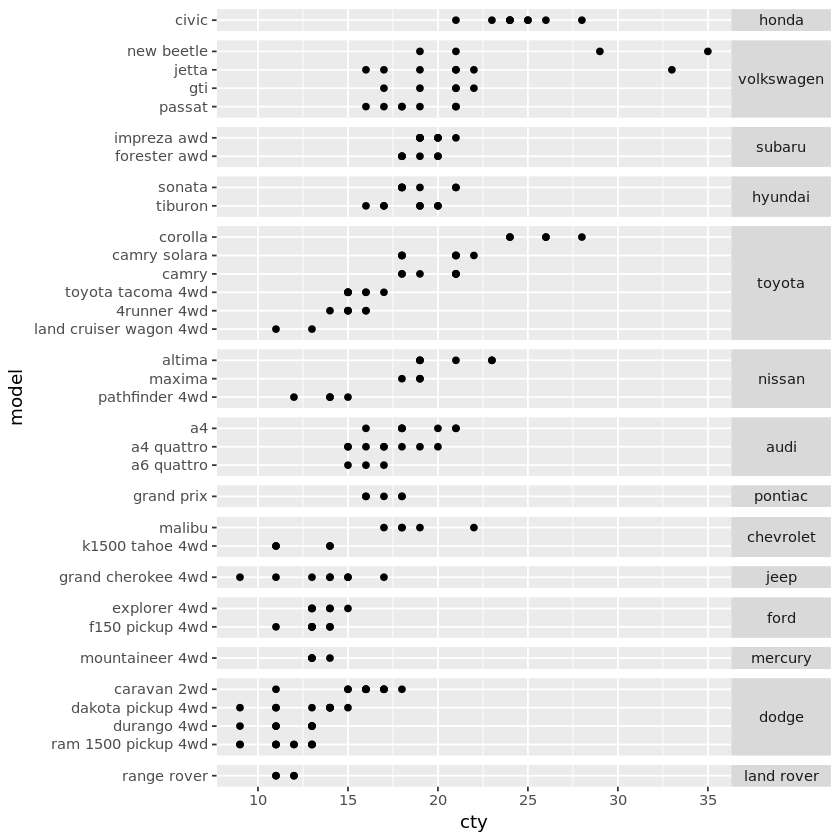

In [29]:
mpg2$model <- reorder(mpg2$model, mpg2$cty)
mpg2$manufacturer <- reorder(mpg2$manufacturer, -mpg2$cty)

ggplot(mpg2, aes(cty, model)) + 
  geom_point() + 
  facet_grid(manufacturer ~ ., scales = "free", space = "free") +
  theme(strip.text.y = element_text(angle = 0))

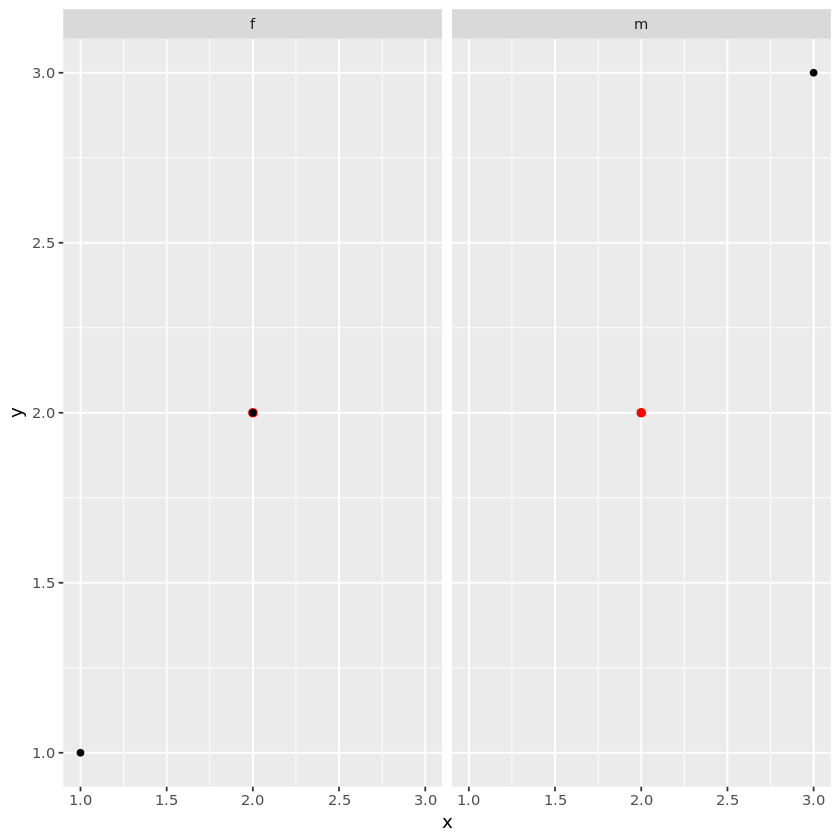

In [30]:
df1 <- data.frame(x = 1:3, y = 1:3, gender = c("f", "f", "m"))
df2 <- data.frame(x = 2, y = 2)

ggplot(df1, aes(x, y)) + 
  geom_point(data = df2, colour = "red", size = 2) + 
  geom_point() + 
  facet_wrap(~gender)

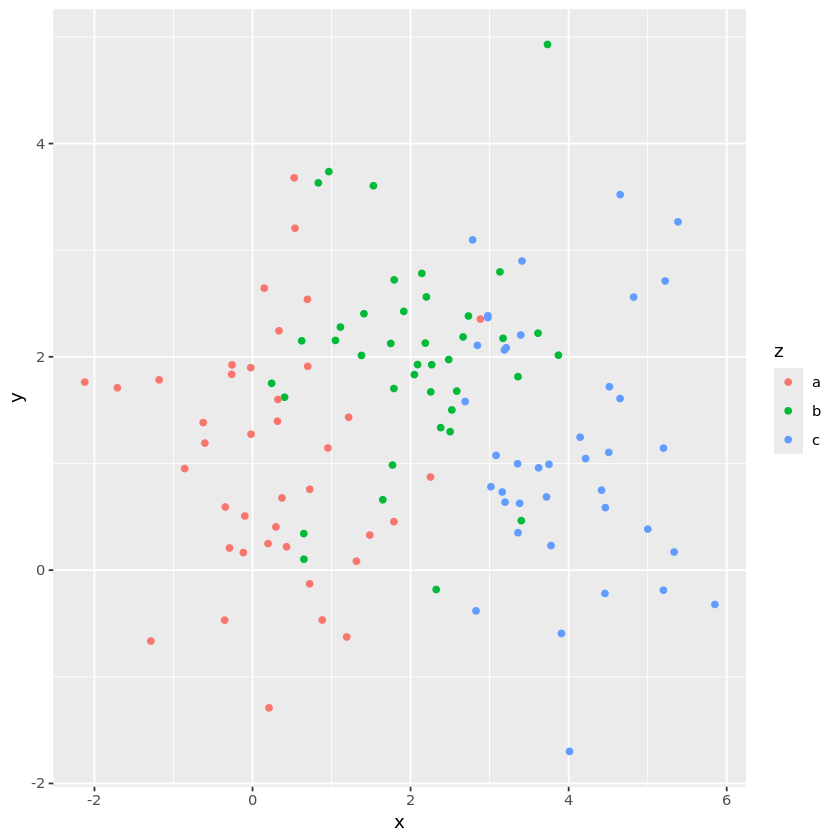

In [31]:
df <- data.frame(
  x = rnorm(120, c(0, 2, 4)),
  y = rnorm(120, c(1, 2, 1)),
  z = letters[1:3]
)

ggplot(df, aes(x, y)) + 
  geom_point(aes(colour = z))

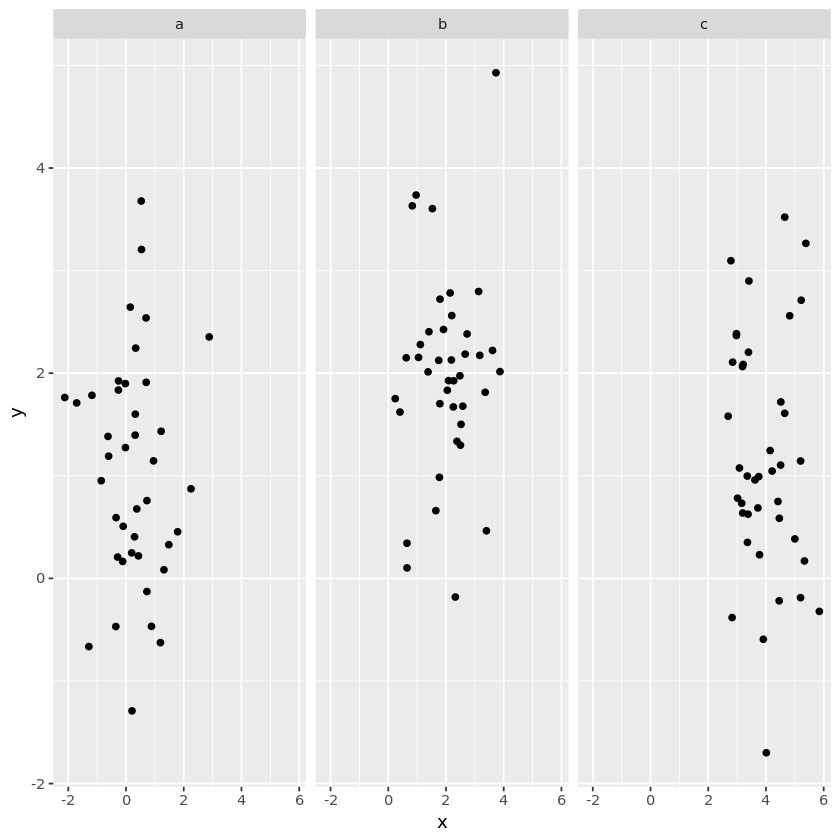

In [32]:
ggplot(df, aes(x, y)) + 
  geom_point() + 
  facet_wrap(~z)

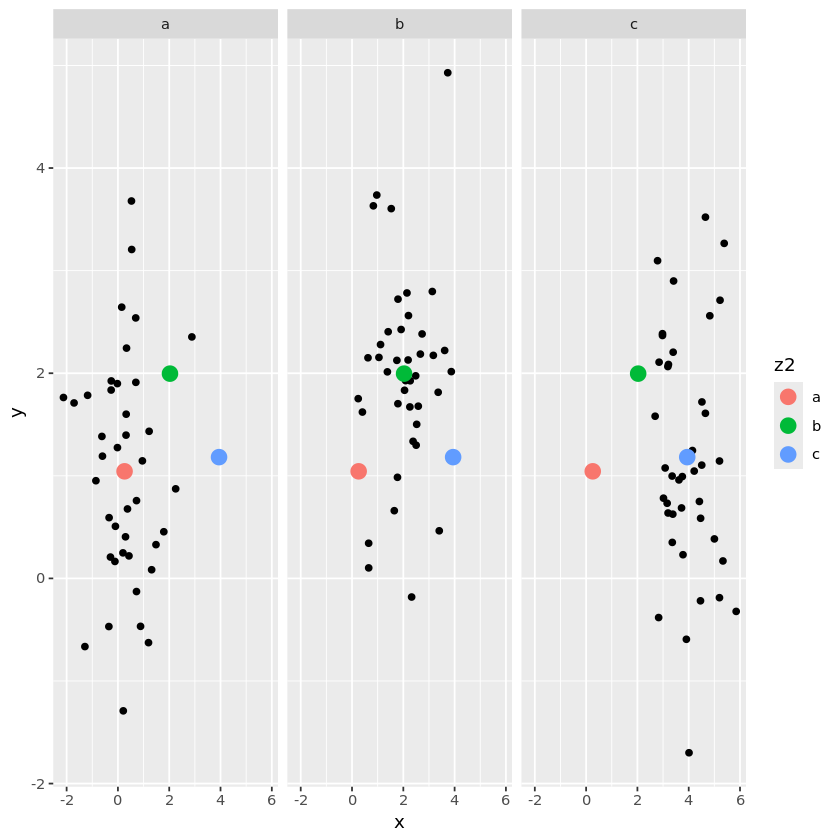

In [37]:
df_sum <- df %>%
  group_by(z) %>%
  summarise(x = mean(x), y = mean(y)) %>%
  rename(z2 = z)

ggplot(df, aes(x, y)) + 
  geom_point() + 
  geom_point(data = df_sum, aes(colour = z2), size = 4) + 
  facet_wrap(~z)

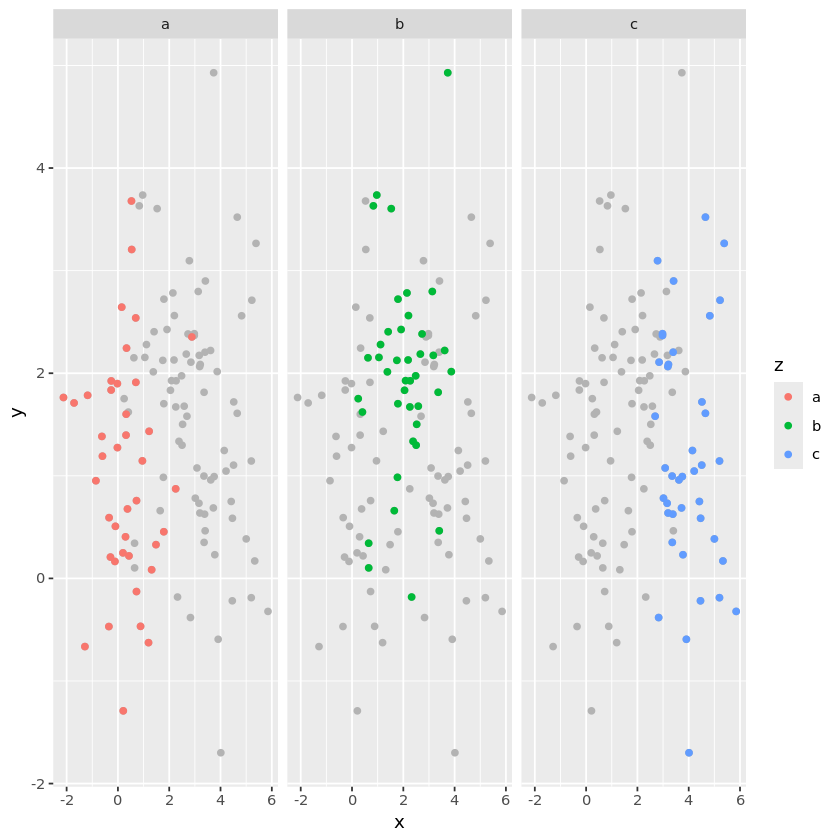

In [38]:
df2 <- dplyr::select(df, -z)

ggplot(df, aes(x, y)) + 
  geom_point(data = df2, colour = "grey70") +
  geom_point(aes(colour = z)) + 
  facet_wrap(~z)

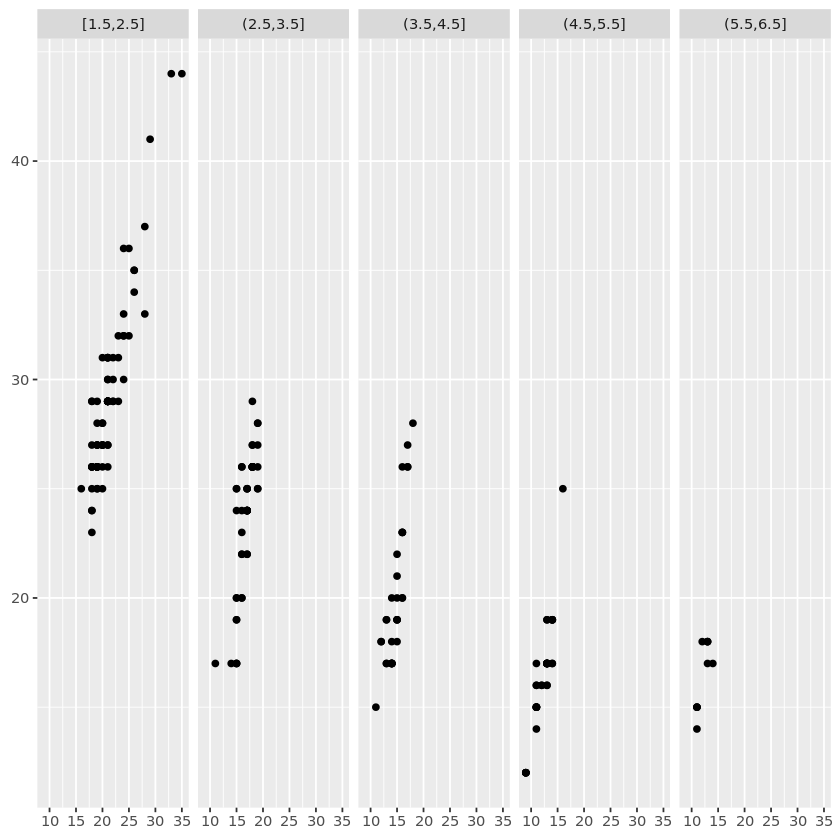

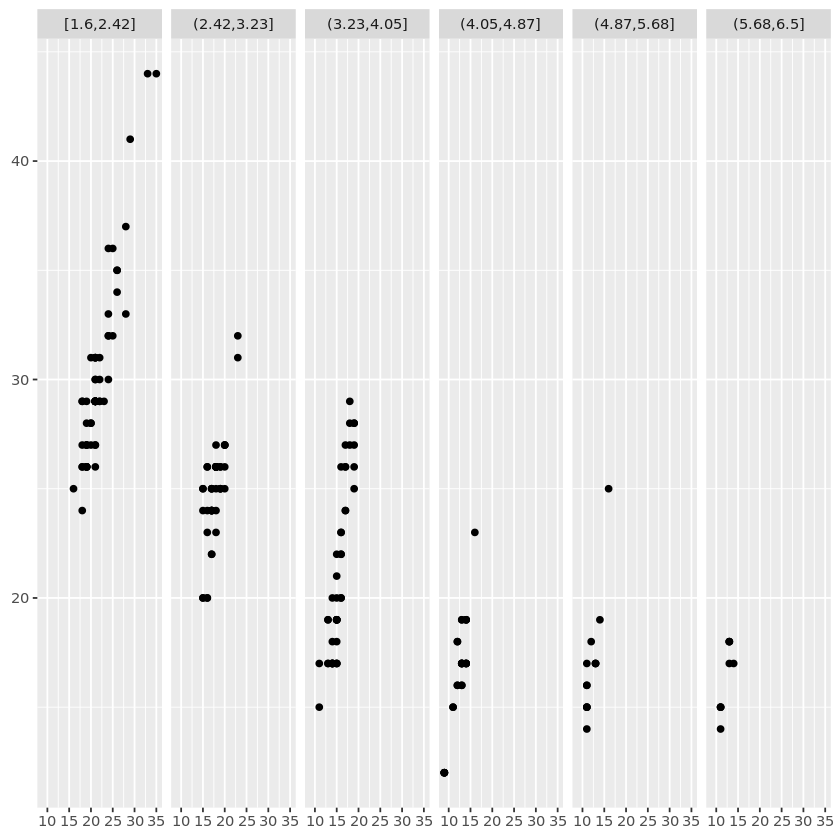

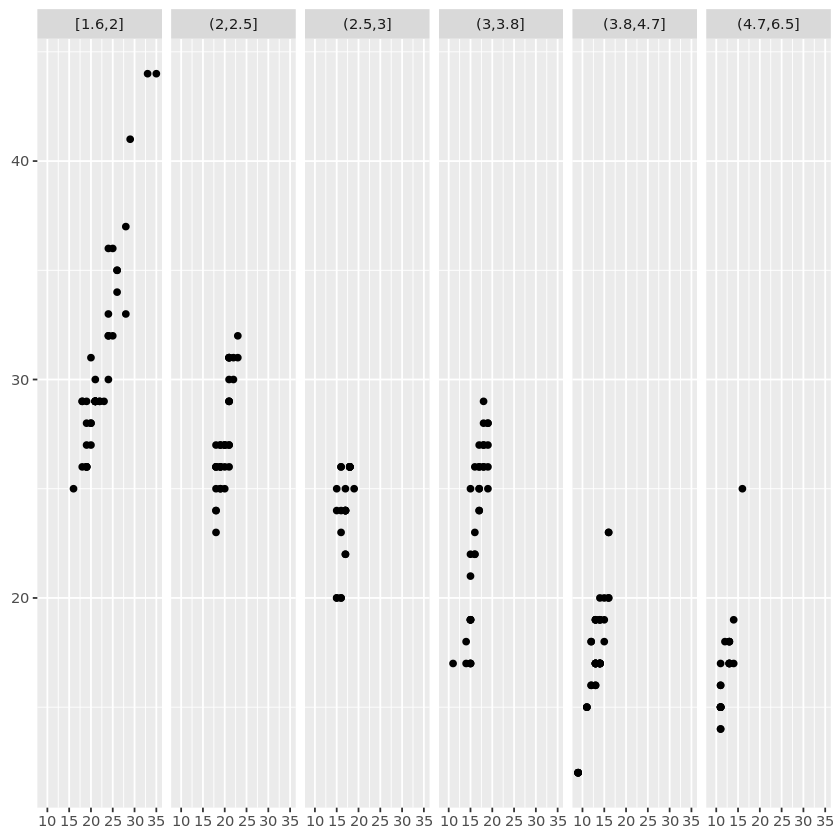

In [39]:
# Bins of width 1
mpg2$disp_w <- cut_width(mpg2$displ, 1)
# Six bins of equal length
mpg2$disp_i <- cut_interval(mpg2$displ, 6)
# Six bins containing equal numbers of points
mpg2$disp_n <- cut_number(mpg2$displ, 6)

plot <- ggplot(mpg2, aes(cty, hwy)) +
  geom_point() +
  labs(x = NULL, y = NULL)
plot + facet_wrap(~disp_w, nrow = 1)
plot + facet_wrap(~disp_i, nrow = 1)
plot + facet_wrap(~disp_n, nrow = 1)